## Simple Linear Regression With NumPY

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("./Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

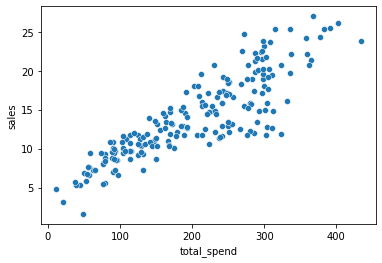

In [4]:
sns.scatterplot(x="total_spend", y="sales", data=df)

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

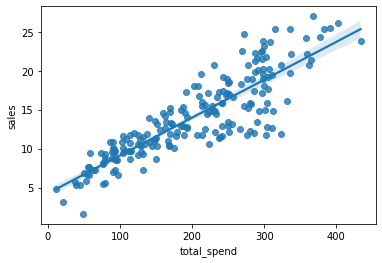

In [5]:
sns.regplot(x="total_spend", y="sales", data=df)

In [6]:
X = df["total_spend"]
y = df["sales"]

In [7]:
np.polyfit(X, y, 1)

array([0.04868788, 4.24302822])

In [11]:
potential_spend = np.linspace(0, 500, 100)

In [12]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822

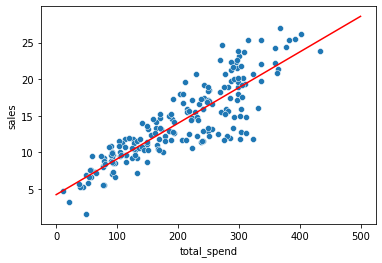

In [13]:
sns.scatterplot(x="total_spend", y="sales", data=df)
plt.plot(potential_spend, predicted_sales, color="red")

In [14]:
spend = 200
predicted_sales = 0.04868788 * spend + 4.24302822
predicted_sales

13.98060422

In [15]:
np.polyfit(X, y, 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [16]:
pot_spend = np.linspace(0, 500, 100)

In [17]:
pred_sales = np.polyval(np.polyfit(X, y, 3), pot_spend)

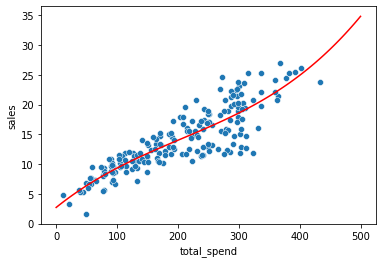

In [18]:
sns.scatterplot(x="total_spend", y="sales", data=df)
plt.plot(pot_spend, pred_sales, color="red")

## Linear Regression With Scikit-Learn

In [19]:
df = pd.read_csv("./Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


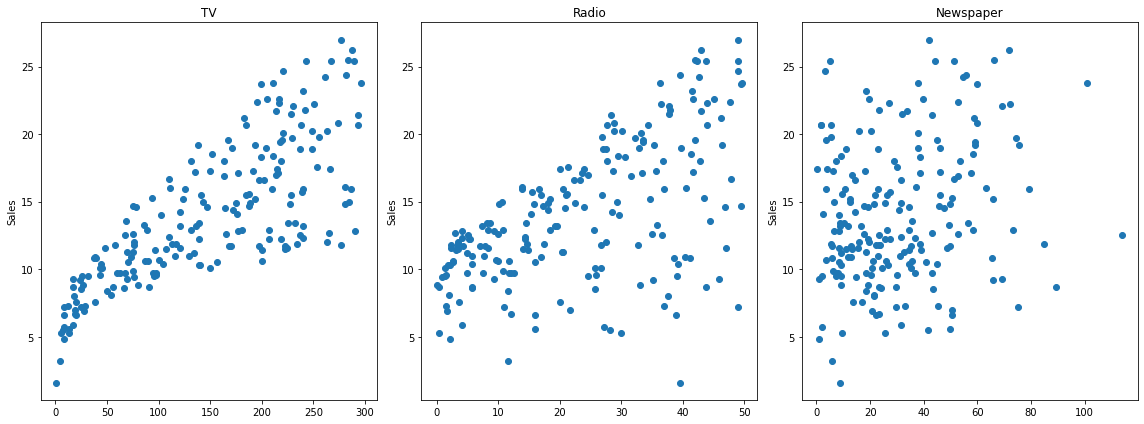

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

axes[0].plot(df["TV"], df["sales"], 'o')
axes[0].set_title("TV")
axes[0].set_ylabel("Sales")

axes[1].plot(df["radio"], df["sales"], 'o')
axes[1].set_title("Radio")
axes[1].set_ylabel("Sales")

axes[2].plot(df["newspaper"], df["sales"], 'o')
axes[2].set_title("Newspaper")
axes[2].set_ylabel("Sales")
plt.tight_layout();

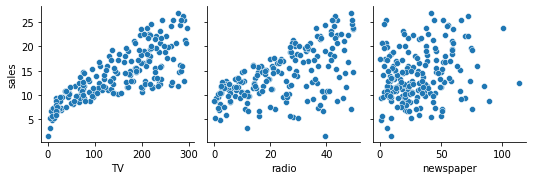

In [22]:
sns.pairplot(df, x_vars=["TV", "radio", "newspaper"], y_vars="sales")

In [23]:
X = df.drop(["sales"], axis=1)
y = df["sales"]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
test_predictions = lm.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

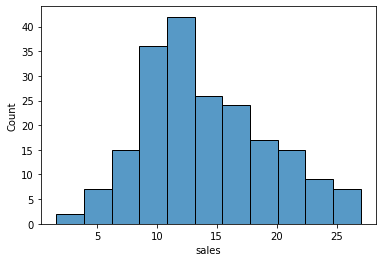

In [31]:
sns.histplot(df['sales'])

In [32]:
mean_absolute_error(y_test, test_predictions)

1.2137457736144808

In [33]:
mean_squared_error(y_test, test_predictions)

2.2987166978863773

In [34]:
# RMSE
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993877

In [35]:
test_residuals = y_test - test_predictions

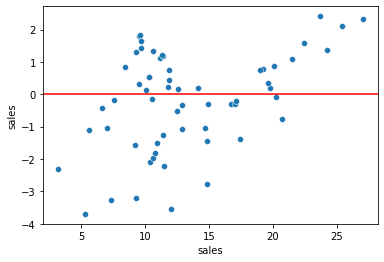

In [37]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red')

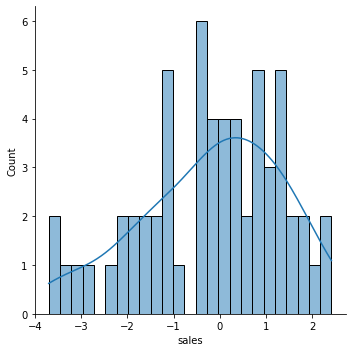

In [39]:
sns.displot(test_residuals, bins=25, kde=True)

In [40]:
import scipy as sp

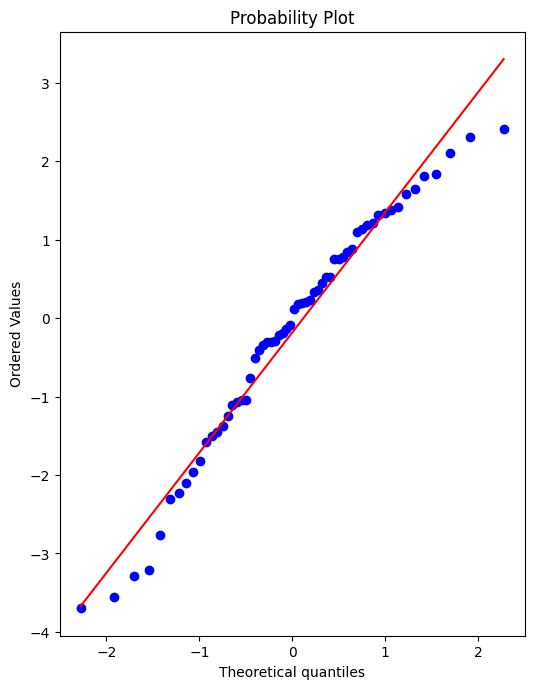

In [41]:
fig, ax = plt.subplots(figsize=(6, 8), dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)

## Model Deployment

In [42]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [43]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [44]:
from joblib import dump, load

dump(final_model, 'final_model.joblib')

['final_model.joblib']

In [45]:
loaded_model = load('final_model.joblib')

In [46]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [49]:
campaign = [[149, 22, 12]]
loaded_model.predict(campaign);

C:\Users\ddeed\miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
